In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib as mpl
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
gs = pd.read_csv("D:/chromedownload/유통&소셜 데이터/gs.csv", encoding ='CP949', parse_dates=['date.gs'])

In [3]:
weather = pd.read_csv("D:/chromedownload/유통&소셜 데이터/weather.csv", encoding ='CP949', parse_dates=['date.wt'])

In [4]:
weather_seoul = weather[weather['region_01.wt']=='서울특별시']
weather_seoul.head(1)

,date.wt,region_id,region_01.wt,region_02.wt,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
2192,2016-01-01,108,서울특별시,종로구,4.0,3.5,-3.3,1.2,73.0,1.6,0.0


In [5]:
weather_seoul = weather_seoul.drop(['region_id', 'region_01.wt'], axis=1)
weather_seoul.head(1)

,date.wt,region_02.wt,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
2192,2016-01-01,종로구,4.0,3.5,-3.3,1.2,73.0,1.6,0.0


In [6]:
gs.head(1)

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,종로구


In [7]:
gs_seoul = gs[gs['reg_01.gs']=='서울특별시']
gs_seoul.head(1)

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,종로구


## 아웃라이어

In [8]:
gs_seoul_sum = gs_seoul.groupby(['date.gs','cat.gs'])['qty.gs'].sum().unstack().reset_index()

In [9]:
gs_seoul_sum.head(1)

cat.gs,date.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,2016-01-01,45293.0,19183.0,266.0,12811.0,343.0,1993.0,6269.0,2783.0,638.0,15929.0,7.0,3480.0


In [10]:
gs_seoul_sum.head()
name = pd.Series(['과자','라면','마스크','맥주','면도기','생리대','생수','숙취해소제','스타킹','아이스크림','우산','탄산음료'])

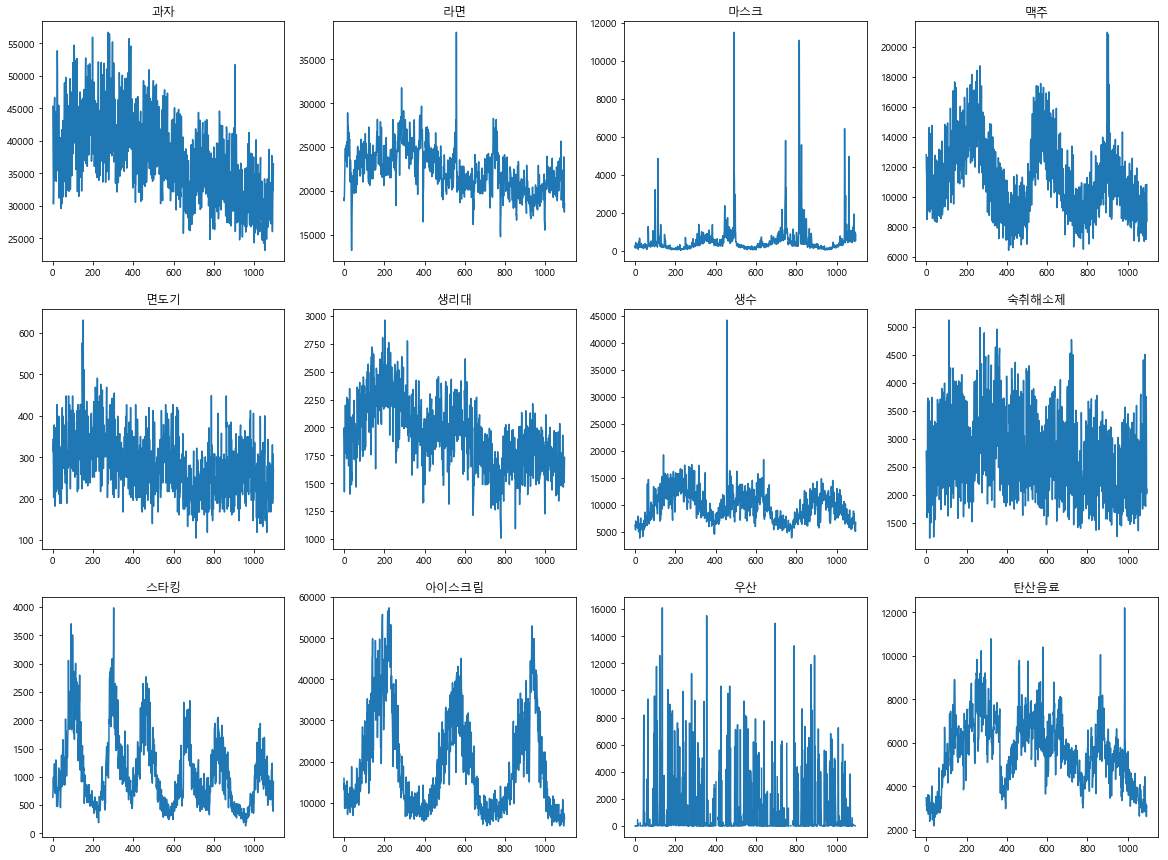

In [68]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,15)

for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(name[i-1])
    value=gs_seoul_sum.iloc[:,i]
    plt.plot(value)

In [12]:
gs_seoul_count = gs_seoul.groupby(['qty.gs','cat.gs'])['cat.gs'].count().unstack().reset_index()

In [13]:
gs_seoul_count.head()

cat.gs,qty.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,7,18706.0,22312.0,20248.0,14779.0,19570.0,30780.0,26795.0,20180.0,24575.0,14516.0,11147.0,28847.0
1,14,16427.0,17721.0,7422.0,11721.0,5599.0,15056.0,16835.0,18272.0,10931.0,13262.0,4808.0,19717.0
2,21,11592.0,11979.0,3195.0,7757.0,2027.0,8627.0,11387.0,10845.0,5728.0,8817.0,2770.0,13882.0
3,28,9037.0,9268.0,1722.0,7809.0,807.0,5426.0,9254.0,8955.0,3555.0,7735.0,1977.0,11203.0
4,35,6648.0,7101.0,1016.0,6494.0,364.0,3847.0,7809.0,6419.0,2367.0,6211.0,1371.0,8777.0


In [14]:
gs_seoul_count.isnull().sum()

cat.gs
qty.gs      0
과자         27
라면        213
마스크       381
맥주        311
면도기       421
생리대       391
생수        216
숙취해소제     384
스타킹       390
아이스크림      89
우산        329
탄산음료      332
dtype: int64

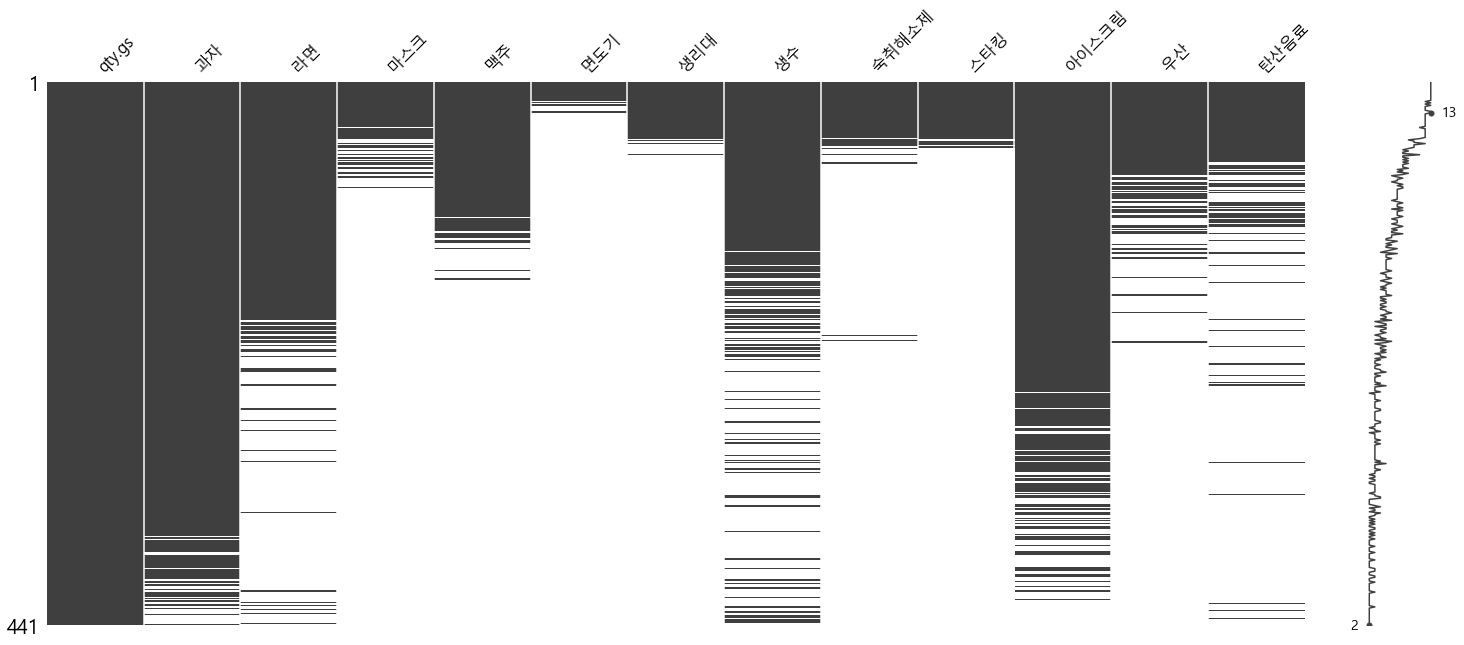

In [15]:
import missingno as msno
msno.matrix(gs_seoul_count)

In [16]:
gs_seoul_count = gs_seoul_count.fillna(0)

In [17]:
name[1]

'라면'

In [18]:
gs_seoul_count.head(1)

cat.gs,qty.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,7,18706.0,22312.0,20248.0,14779.0,19570.0,30780.0,26795.0,20180.0,24575.0,14516.0,11147.0,28847.0


In [19]:
from scipy.stats import skew
from scipy.stats import kurtosis


In [20]:
gs_seoul_count_skew = pd.DataFrame()
gs_seoul_count_kurt = pd.DataFrame()

for col in gs_seoul_count.columns[2:-1]:
    gs_seoul_count_skew = pd.concat([gs_seoul_count_skew, gs_seoul_count.apply(lambda x: skew(x))], axis=1)
    gs_seoul_count_skew.round(2)
    #gs_seoul_count_skew.rename(columns = {col: col+'_skew'}, inplace=True)
gs_seoul_count_skew.reset_index(inplace= True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [21]:
for col in gs_seoul_count.columns[2:-1]:
    gs_seoul_count_kurt = pd.concat([gs_seoul_count_kurt, gs_seoul_count.apply(lambda x: kurtosis(x))], axis=1)
    #gs_seoul_count_kurt.rename(columns = {col: col+'_kurt'}, inplace=True)
gs_seoul_count_kurt.reset_index(inplace= True)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [22]:
gs_seoul_count_skew=gs_seoul_count_skew.round(2)

In [23]:
gs_seoul_count_kurt = gs_seoul_count_kurt.round(2)

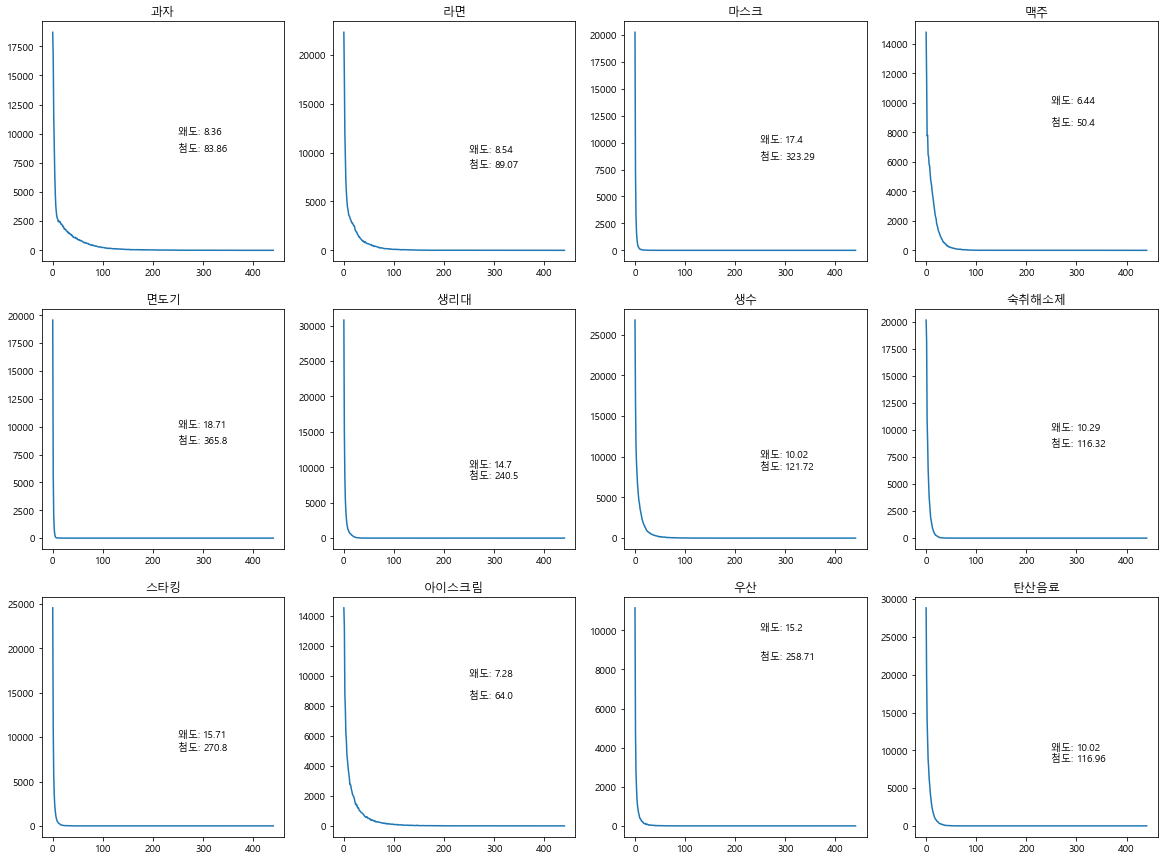

In [24]:
plt.figure()
plt.rcParams["figure.figsize"] = (20,15)

for i in range(1,13):
    plt.subplot(3,4,i)
    plt.title(name[i-1])
    plt.text(250,10000,'왜도: ')
    plt.text(250,8500,'첨도: ')
    plt.text(300,10000, gs_seoul_count_skew.iloc[i,1])
    plt.text(300,8500, gs_seoul_count_kurt.iloc[i,1])
    value=gs_seoul_count.iloc[:,i]
    plt.plot(value)

In [25]:
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강남구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "송파구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "마포구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "영등포구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강서구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "관악구", "reg_02.gs"] = '4분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "서초구", "reg_02.gs"] = '4분위수'

gs_seoul.ix[gs_seoul['reg_02.gs'] == "은평구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "성북구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "동작구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "동대문구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "노원구", "reg_02.gs"] = '3분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "광진구", "reg_02.gs"] = '3분위수'

gs_seoul.ix[gs_seoul['reg_02.gs'] == "구로구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "중구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강동구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "중랑구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "서대문구", "reg_02.gs"] = '2분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "양천구", "reg_02.gs"] = '2분위수'

# (금천구, 종로구, 용산구, 강북구, 성동구, 도봉구)
gs_seoul.ix[gs_seoul['reg_02.gs'] == "금천구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "종로구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "용산구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "강북구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "성동구", "reg_02.gs"] = '1분위수'
gs_seoul.ix[gs_seoul['reg_02.gs'] == "도봉구", "reg_02.gs"] = '1분위수'

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecate

### 날짜 /구 /  카테고리 분류

In [26]:
gs_seoul.head(1)

,reg_01.gs,date.gs,gen.gs,age.gs,cat.gs,qty.gs,reg_02.gs
0,서울특별시,2016-01-01,F,00~19,라면,7,1분위수


In [27]:
gs_seoul_1 = gs_seoul.groupby(['date.gs','reg_02.gs','cat.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')
gs_seoul_1=gs_seoul_1.fillna('0')
gs_seoul_1.head()

cat.gs,date.gs,reg_02.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료
0,2016-01-01,1분위수,5853.0,2508.0,77,1659.0,35,253.0,717.0,316.0,77.0,2373.0,0,322.0
1,2016-01-01,2분위수,9280.0,4149.0,49,2480.0,63,378.0,1412.0,779.0,112.0,3105.0,7,828.0
2,2016-01-01,3분위수,9937.0,4113.0,63,2776.0,63,357.0,1055.0,427.0,91.0,2989.0,0,792.0
3,2016-01-01,4분위수,20223.0,8413.0,77,5896.0,182,1005.0,3085.0,1261.0,358.0,7462.0,0,1538.0
4,2016-01-02,1분위수,5529.0,2576.0,35,1838.0,21,246.0,638.0,512.0,105.0,1963.0,0,497.0


In [28]:
gs_seoul_1['과자']=gs_seoul_1['과자'].astype(float)
gs_seoul_1['라면']=gs_seoul_1['라면'].astype(float)
gs_seoul_1['마스크']=gs_seoul_1['마스크'].astype(float)
gs_seoul_1['맥주']=gs_seoul_1['맥주'].astype(float)
gs_seoul_1['면도기']=gs_seoul_1['면도기'].astype(float)
gs_seoul_1['생리대']=gs_seoul_1['생리대'].astype(float)
gs_seoul_1['생수']=gs_seoul_1['생수'].astype(float)
gs_seoul_1['숙취해소제']=gs_seoul_1['숙취해소제'].astype(float)
gs_seoul_1['스타킹']=gs_seoul_1['스타킹'].astype(float)
gs_seoul_1['아이스크림']=gs_seoul_1['아이스크림'].astype(float)
gs_seoul_1['우산']=gs_seoul_1['우산'].astype(float)
gs_seoul_1['탄산음료']=gs_seoul_1['탄산음료'].astype(float)

In [29]:
gs_seoul_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 14 columns):
date.gs      4384 non-null datetime64[ns]
reg_02.gs    4384 non-null object
과자           4384 non-null float64
라면           4384 non-null float64
마스크          4384 non-null float64
맥주           4384 non-null float64
면도기          4384 non-null float64
생리대          4384 non-null float64
생수           4384 non-null float64
숙취해소제        4384 non-null float64
스타킹          4384 non-null float64
아이스크림        4384 non-null float64
우산           4384 non-null float64
탄산음료         4384 non-null float64
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 479.6+ KB


In [30]:
gs_seoul_1['스테디셀러'] = gs_seoul_1['과자']+gs_seoul_1['라면']+gs_seoul_1['숙취해소제']
gs_seoul_1['일회용품'] = gs_seoul_1['면도기']+gs_seoul_1['생리대']
gs_seoul_1['계절성(여름,겨울)'] = gs_seoul_1['맥주']+gs_seoul_1['아이스크림'] +gs_seoul_1['탄산음료']+gs_seoul_1['생수']

In [31]:
gs_seoul_1.head(1) #마스크 우산

cat.gs,date.gs,reg_02.gs,과자,라면,마스크,맥주,면도기,생리대,생수,숙취해소제,스타킹,아이스크림,우산,탄산음료,스테디셀러,일회용품,"계절성(여름,겨울)"
0,2016-01-01,1분위수,5853.0,2508.0,77.0,1659.0,35.0,253.0,717.0,316.0,77.0,2373.0,0.0,322.0,8677.0,288.0,5071.0


In [32]:
gs_seoul_1=gs_seoul_1.drop(['과자'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['라면'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['맥주'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['면도기'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['생리대'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['생수'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['숙취해소제'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['아이스크림'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['우산'], axis=1)
gs_seoul_1=gs_seoul_1.drop(['탄산음료'], axis=1)



#'라면','맥주','면도기','생리대', '생수','숙취해소제','아이스크림','우산','탄산음료'])

In [33]:
gs_seoul_1.head(1)

cat.gs,date.gs,reg_02.gs,마스크,스타킹,스테디셀러,일회용품,"계절성(여름,겨울)"
0,2016-01-01,1분위수,77.0,77.0,8677.0,288.0,5071.0


### 날짜 / 구 / 연령대

In [34]:
gs_seoul_2=gs_seoul.groupby(['date.gs','reg_02.gs','age.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')

In [35]:
gs_seoul_2.head()

age.gs,date.gs,reg_02.gs,00~19,20~39,40~59,60~99
0,2016-01-01,1분위수,357,9203,4293,337
1,2016-01-01,2분위수,497,15798,5885,462
2,2016-01-01,3분위수,659,15310,6204,490
3,2016-01-01,4분위수,945,36204,11067,1284
4,2016-01-02,1분위수,525,9456,3692,287


#### 날짜 / 구 / 성별

In [36]:
gs_seoul_3=gs_seoul.groupby(['date.gs','reg_02.gs','gen.gs'])['qty.gs'].sum().unstack().reset_index().fillna('0')

In [37]:
gs_seoul_3.head()

gen.gs,date.gs,reg_02.gs,F,M
0,2016-01-01,1분위수,8250,5940
1,2016-01-01,2분위수,13243,9399
2,2016-01-01,3분위수,13760,8903
3,2016-01-01,4분위수,29628,19872
4,2016-01-02,1분위수,7622,6338


## Merge 이용해 값 합치기

In [38]:
gs_seoul_a=pd.merge(gs_seoul_1, gs_seoul_2, on=['date.gs','reg_02.gs'])

In [39]:
gs_seoul_df=pd.merge(gs_seoul_a,gs_seoul_3, on=['date.gs','reg_02.gs'])

In [40]:
gs_seoul_df.head()

,date.gs,reg_02.gs,마스크,스타킹,스테디셀러,일회용품,"계절성(여름,겨울)",00~19,20~39,40~59,60~99,F,M
0,2016-01-01,1분위수,77.0,77.0,8677.0,288.0,5071.0,357,9203,4293,337,8250,5940
1,2016-01-01,2분위수,49.0,112.0,14208.0,441.0,7825.0,497,15798,5885,462,13243,9399
2,2016-01-01,3분위수,63.0,91.0,14477.0,420.0,7612.0,659,15310,6204,490,13760,8903
3,2016-01-01,4분위수,77.0,358.0,29897.0,1187.0,17981.0,945,36204,11067,1284,29628,19872
4,2016-01-02,1분위수,35.0,105.0,8617.0,267.0,4936.0,525,9456,3692,287,7622,6338


### Weather 자료와 Merge

In [41]:
weather_seoul = weather_seoul.rename(columns={'date.wt':'date.gs', 'region_02.wt':'reg_02.gs'})

In [42]:
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강남구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "송파구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "마포구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "영등포구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강서구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "관악구", "reg_02.gs"] = '4분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "서초구", "reg_02.gs"] = '4분위수'

weather_seoul.ix[weather_seoul['reg_02.gs'] == "은평구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "성북구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "동작구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "동대문구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "노원구", "reg_02.gs"] = '3분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "광진구", "reg_02.gs"] = '3분위수'

weather_seoul.ix[weather_seoul['reg_02.gs'] == "구로구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "중구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강동구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "중랑구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "서대문구", "reg_02.gs"] = '2분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "양천구", "reg_02.gs"] = '2분위수'

# (금천구, 종로구, 용산구, 강북구, 성동구, 도봉구)
weather_seoul.ix[weather_seoul['reg_02.gs'] == "금천구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "종로구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "용산구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "강북구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "성동구", "reg_02.gs"] = '1분위수'
weather_seoul.ix[weather_seoul['reg_02.gs'] == "도봉구", "reg_02.gs"] = '1분위수'

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doi

In [43]:
weather_seoul=weather_seoul.sort_values(by=['date.gs','reg_02.gs'])

#weather_seoul_1 = weather_seoul.iloc(0:365,)

In [44]:
weather_seoul_mean=weather_seoul.groupby(['date.gs','reg_02.gs']).mean().round(1).fillna(0)

## GS와 Weather 합치기

In [45]:
seoul_df=pd.merge(gs_seoul_df, weather_seoul_mean, on=['date.gs','reg_02.gs'])

In [46]:
seoul_df.tail(100)

,date.gs,reg_02.gs,마스크,스타킹,스테디셀러,일회용품,"계절성(여름,겨울)",00~19,20~39,40~59,60~99,F,M,temp_max,wind_max,temp_min,temp_avg,rhumid_avg,wa_avg,rain_sum
4284,2018-12-07,1분위수,119.0,189.0,9833.0,336.0,3676.0,561,9061,4335,196,8320,5833,-0.5,5.4,-8.7,-6.6,38.5,3.2,0.0
4285,2018-12-07,2분위수,189.0,189.0,12108.0,561.0,4875.0,856,12178,4552,336,11573,6349,-0.9,5.7,-9.2,-6.9,39.0,3.2,0.0
4286,2018-12-07,3분위수,133.0,154.0,11603.0,406.0,4784.0,728,11052,5034,266,10445,6635,-0.9,5.5,-9.7,-7.0,38.2,2.9,0.0
4287,2018-12-07,4분위수,448.0,484.0,27656.0,977.0,9987.0,728,26475,11347,1002,22692,16860,-0.4,5.8,-8.5,-6.6,38.0,3.6,0.0
4288,2018-12-08,1분위수,91.0,70.0,9302.0,294.0,3363.0,385,8248,3954,533,7299,5821,-3.7,5.1,-10.3,-7.4,37.2,2.6,0.0
4289,2018-12-08,2분위수,238.0,147.0,13190.0,393.0,5297.0,518,13514,4911,322,11972,7293,-4.0,5.0,-11.0,-8.0,38.3,2.7,0.0
4290,2018-12-08,3분위수,210.0,161.0,13315.0,371.0,5559.0,609,13232,5411,364,11361,8255,-3.8,4.6,-11.1,-8.0,36.8,2.2,0.0
4291,2018-12-08,4분위수,532.0,455.0,27226.0,857.0,11575.0,1044,28422,10374,805,24127,16518,-4.0,4.6,-10.3,-7.6,38.0,2.7,0.0
4292,2018-12-09,1분위수,77.0,63.0,8944.0,273.0,3731.0,406,8034,4361,287,7293,5795,-2.2,3.6,-10.6,-6.3,31.2,1.6,0.0
4293,2018-12-09,2분위수,126.0,91.0,13198.0,308.0,5424.0,476,13418,4861,392,10912,8235,-2.6,3.3,-11.4,-7.0,34.3,1.5,0.0


# 머신러닝 추가


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib as mpl
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
gs = pd.read_csv("D:/chromedownload/predict_dt.csv", encoding ='CP949')

In [3]:
seoul_df=pd.DataFrame(data=gs)

In [4]:
seoul_df.head()

,date,mask_01,stacking_01,steady seller_01,disposable_01,season(S/W)_01,mask_02,stacking_02,steady seller_02,disposable_02,...,temp_avg,wind_avg,rain_sum,temp_range,dust_avg,am_dust,am_restuarent,am_hobby,am_health,am_date
0,2016-01-01,42.0,77.0,8022.0,210.0,5071.0,49.0,112.0,10057.0,371.0,...,1.832,0.980,0.0,7.504,56.0,312,3843,1984,9386,2427
1,2016-01-02,35.0,105.0,7863.0,182.0,4936.0,14.0,147.0,8632.0,252.0,...,6.472,1.296,0.0,7.516,42.0,399,5105,2362,6338,2777
2,2016-01-03,56.0,112.0,6858.0,266.0,4594.0,105.0,147.0,8207.0,294.0,...,6.592,0.924,0.0,5.048,86.0,1019,5374,2295,5945,2733
3,2016-01-04,49.0,98.0,6348.0,259.0,4099.0,70.0,140.0,8523.0,266.0,...,2.800,2.132,0.0,8.844,73.0,1888,6991,2678,9748,3438
4,2016-01-05,21.0,56.0,6423.0,182.0,3534.0,28.0,77.0,9043.0,280.0,...,-1.760,1.704,0.0,5.416,31.0,951,6807,2922,9611,3518


In [5]:
seoul_df_1=seoul_df.iloc[0:,[0,-5,-6, 1,1, 6,6,11,11,16,16]]
#최대온도, 최대, 최소 값등은 각 독립변수간에 다중공선성의 영향을 미칠 것 같아서 일단 제외함
# 마스크도 마찬가지로 미세먼지 데이터가 추가되었을때 추가로 분석하기 위해서 제외

In [6]:
seoul_df_1.columns=['date', 'am_dust', 'dust','m1', 'm1_1','m2','m2_1','m3','m3_1','m4','m4_1']

In [7]:
seoul_df_1.m1_1=seoul_df_1.m1_1.shift(-1)
seoul_df_1.m2_1=seoul_df_1.m2_1.shift(-1)
seoul_df_1.m3_1=seoul_df_1.m3_1.shift(-1)
seoul_df_1.m4_1=seoul_df_1.m4_1.shift(-1)

In [8]:
print(seoul_df_1.shape)
print(seoul_df_1.tail())

(1096, 11)
            date  am_dust  dust     m1   m1_1     m2   m2_1     m3   m3_1  \
1091  2018-12-27     1739  27.0   91.0   70.0  119.0  168.0  175.0  147.0   
1092  2018-12-28     1558  32.0   70.0  119.0  168.0  112.0  147.0  154.0   
1093  2018-12-29      957  32.0  119.0   70.0  112.0   56.0  154.0  105.0   
1094  2018-12-30      989  36.0   70.0  105.0   56.0  126.0  105.0  112.0   
1095  2018-12-31     1376  55.0  105.0    NaN  126.0    NaN  112.0    NaN   

         m4   m4_1  
1091  217.0  280.0  
1092  280.0  280.0  
1093  280.0  147.0  
1094  147.0  266.0  
1095  266.0    NaN  


In [9]:
seoul_df_1 = seoul_df_1.drop([1095],0) # 한칸 밀려서 결측치가 생긴 값을 삭제 #2018-12-31 일자의 데이터 삭제

print(seoul_df_1.tail(1))


            date  am_dust  dust    m1   m1_1    m2   m2_1     m3   m3_1  \
1094  2018-12-30      989  36.0  70.0  105.0  56.0  126.0  105.0  112.0   

         m4   m4_1  
1094  147.0  266.0  


In [10]:
date=np.array(seoul_df_1.date)
date

array(['2016-01-01', '2016-01-02', '2016-01-03', ..., '2018-12-28',
       '2018-12-29', '2018-12-30'], dtype=object)

In [11]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

data_train=seoul_df_1[seoul_df_1.date < '2018-01-01']
data_test = seoul_df_1[seoul_df_1.date>='2018-01-01']
data_all=seoul_df_1['date']

data_train=data_train.iloc[0:,[1,2,3,4,5,6,7,8,9,10]] 
data_test=data_test.iloc[0:,[1,2,3,4,5,6,7,8,9,10]]

min = data_train.min(axis=0)
data_train -= min
max = data_train.max(axis=0)
data_train /= (max-min)

data_test -= min
data_test /= (max-min)
# 각 데이터 정규화


In [12]:
data_test.shape

(364, 10)

In [13]:
data_train.tail()

,am_dust,dust,m1,m1_1,m2,m2_1,m3,m3_1,m4,m4_1
726,0.016820,0.108108,0.257143,0.342857,0.459459,0.324324,0.594595,0.243243,0.613636,0.840909
727,0.020876,0.183784,0.342857,0.485714,0.324324,0.783784,0.243243,0.486486,0.840909,0.931818
728,0.055650,0.394595,0.485714,0.542857,0.783784,0.702703,0.486486,0.837838,0.931818,1.045455
729,0.094736,0.508108,0.542857,0.371429,0.702703,0.432432,0.837838,0.297297,1.045455,0.750000
730,0.041582,0.227027,0.371429,0.342857,0.432432,0.351351,0.297297,0.513514,0.750000,0.681818


In [14]:
data_train.shape

(731, 10)

In [15]:
am_dust=np.array(data_train.am_dust).reshape(-1,1)
dust=np.array(data_train.dust).reshape(-1,1)
y_train_1=np.array(data_train.m1).astype(np.float32).reshape(-1,1)
y_train_2=np.array(data_train.m2).astype(np.float32).reshape(-1,1)
y_train_3=np.array(data_train.m3).astype(np.float32).reshape(-1,1)
y_train_4=np.array(data_train.m4).astype(np.float32).reshape(-1,1)


#y_train_1=np.array(data_train.m1_1).astype(np.float32).reshape(-1,1)
#y_train_2=np.array(data_train.m2_1).astype(np.float32).reshape(-1,1)
#y_train_3=np.array(data_train.m3_1).astype(np.float32).reshape(-1,1)
#y_train_4=np.array(data_train.m4_1).astype(np.float32).reshape(-1,1)
y_train= np.vstack([y_train_1,y_train_2,y_train_3,y_train_4]).transpose()
# --train 전처리

am_dust_t=np.array(data_test.am_dust).reshape(-1,1)
dust_t=np.array(data_test.dust).reshape(-1,1)

y_test_1=np.array(data_test.m1).astype(np.float32).reshape(-1,1)
y_test_2=np.array(data_test.m2).astype(np.float32).reshape(-1,1)
y_test_3=np.array(data_test.m3).astype(np.float32).reshape(-1,1)
y_test_4=np.array(data_test.m4).astype(np.float32).reshape(-1,1)
y_test= np.vstack([y_test_1,y_test_2, y_test_3,y_test_4]).transpose()

X_train=np.hstack([am_dust,dust])#.transpose()
X_test=np.hstack([am_dust_t,dust_t])#.transpose()

print(X_train.shape, y_train_1.shape)



(731, 2) (731, 1)


In [16]:
print(X_test.shape, y_test_1.shape,y_test_2.shape,y_test_3.shape)

(364, 2) (364, 1) (364, 1) (364, 1)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

linear_reg1=LinearRegression().fit(X_train,y_train_1)
linear_reg2=LinearRegression().fit(X_train,y_train_2)
linear_reg3=LinearRegression().fit(X_train,y_train_3)
linear_reg4=LinearRegression().fit(X_train,y_train_4)



In [18]:
pred_lr_1=linear_reg1.predict(X_test)

pred_lr_2=linear_reg2.predict(X_test)


pred_lr_3=linear_reg3.predict(X_test)

pred_lr_4=linear_reg4.predict(X_test)



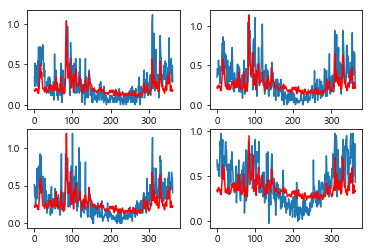

In [19]:
import numpy as np
import matplotlib.pyplot as plt
date=range(364)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_lr_1, 'r-')

plt.subplot(222)
plt.plot(date, y_test_2, date, pred_lr_2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_lr_3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_lr_4, 'r-')

plt.show()
#선형모델 예측결과

#1회용품결과는 매우 떨어짐

In [20]:
mse1=pred_lr_1-y_test_1
mse2=pred_lr_2-y_test_2
mse3=pred_lr_3-y_test_3
mse4=pred_lr_4-y_test_4
x=0
for x in mse4:
    x=x+x**2
x=x/364
print(x)

[-0.00022289]


In [21]:
print(np.sqrt(mean_squared_error(pred_lr_1, y_test_1)))

print(np.sqrt(mean_squared_error(pred_lr_2, y_test_2)))
print(np.sqrt(mean_squared_error(pred_lr_3, y_test_3)))
print(np.sqrt(mean_squared_error(pred_lr_4, y_test_4)))

NameError: name 'mean_squared_error' is not defined

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 코드 실행전 데이터전처리 열 재실행 후 실행
tree1 = DecisionTreeRegressor().fit(X_train,y_train_1)
tree2 = DecisionTreeRegressor().fit(X_train,y_train_2)
tree3 = DecisionTreeRegressor().fit(X_train,y_train_3)
tree4 = DecisionTreeRegressor().fit(X_train,y_train_4)

pred_tree1=tree1.predict(X_test)
pred_tree2=tree2.predict(X_test)
pred_tree3=tree3.predict(X_test)
pred_tree4=tree4.predict(X_test)



date=range(364)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_tree1, 'r-')

plt.subplot(222)
plt.plot(date, y_test_2, date, pred_tree2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_tree3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_tree4, 'r-')

plt.show()

In [22]:
mse=pred_tree1-y_test_1
mse = np.array(mse).reshape(-1,)
mse2=pred_tree2-y_test_2
mse2 = np.array(mse2).reshape(-1,)
mse3=pred_tree3-y_test_3
mse3 = np.array(mse3).reshape(-1,)
mse4=pred_tree4-y_test_4
mse4 = np.array(mse4).reshape(-1,)
x=0
for x in mse4:
    x=x+x**2
x=x/363


print(x)

NameError: name 'pred_tree1' is not defined

In [23]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(pred_tree1, y_test_1)))

print(np.sqrt(mean_squared_error(pred_tree2, y_test_2)))
print(np.sqrt(mean_squared_error(pred_tree3, y_test_3)))
print(np.sqrt(mean_squared_error(pred_tree4, y_test_4)))

NameError: name 'pred_tree1' is not defined

In [24]:
print("특성중요도 : \n {}".format(tree1.feature_importances_)) # 전날 팔린 스타킹 개수가 다음 날 스타킹 판매에 가장 큰 영향을 끼치는 피쳐

NameError: name 'tree1' is not defined

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

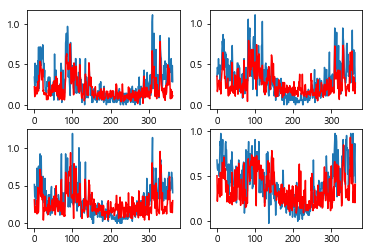

In [25]:
from sklearn.ensemble import RandomForestRegressor

Rtree1 = RandomForestRegressor().fit(X_train,y_train_1)
Rtree2 = RandomForestRegressor().fit(X_train,y_train_2)
Rtree3 = RandomForestRegressor().fit(X_train,y_train_3)
Rtree4 = RandomForestRegressor().fit(X_train,y_train_4)

pred_Rtree1=Rtree1.predict(X_test)
pred_Rtree2=Rtree2.predict(X_test)
pred_Rtree3=Rtree3.predict(X_test)
pred_Rtree4=Rtree4.predict(X_test)


date=range(364)

plt.subplot(221)
plt.plot(date, y_test_1, date, pred_Rtree1, 'r-')

plt.subplot(222)
plt.plot(date, y_test_2, date, pred_Rtree2, 'r-')

plt.subplot(223)
plt.plot(date, y_test_3, date, pred_Rtree3, 'r-')

plt.subplot(224)
plt.plot(date, y_test_4, date, pred_Rtree4, 'r-')

plt.show()

In [30]:
mse=pred_Rtree1-y_test_1
mse = np.array(mse).reshape(-1,)
mse2=pred_Rtree2-y_test_2
mse2 = np.array(mse2).reshape(-1,)
mse3=pred_Rtree3-y_test_3
mse3 = np.array(mse3).reshape(-1,)
mse4=pred_Rtree4-y_test_4
mse4 = np.array(mse4).reshape(-1,)
x=0

for x in mse4:
    x=x+x**2
x=x/363
print(x) # 랜덤포레스트가 그냥 결정트리보다 예측률이 좋음

-5.5196032377916474e-05


In [31]:
print(np.sqrt(mean_squared_error(pred_Rtree1, y_test_1)))

print(np.sqrt(mean_squared_error(pred_Rtree2, y_test_2)))
print(np.sqrt(mean_squared_error(pred_Rtree3, y_test_3)))
print(np.sqrt(mean_squared_error(pred_Rtree4, y_test_4)))

0.1618938617531727
0.18610602223292996
0.19462687033194456
0.22181141220263162


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

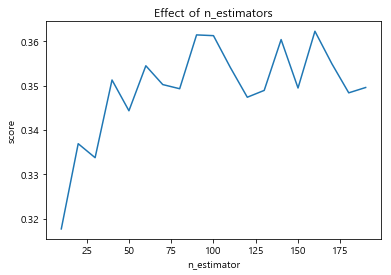

In [32]:
model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train_1)
    scores.append(model.score(X_test, y_test_1))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [33]:
mse_tr=pred_tree1-y_test_1
mse_tr = np.array(mse_tr).reshape(-1,1)

i = 0
for i in mse_tr:
    i=i+i**2

print(i/len(mse_tr))

#Tree model의 결과가 선형보다는 좋게 나옴


NameError: name 'pred_tree1' is not defined

In [35]:
import tensorflow as tf

In [36]:
tf.reset_default_graph()
n_inputs= 2
n_hidden1 = 2
n_hidden2 =2
n_outputs=1 # 한개씩 따로본다


In [37]:
X=tf.placeholder(tf.float32, shape=(None, n_inputs),name='X')
y=tf.placeholder(tf.float32, shape=(None), name= 'y')

keep_prob = tf.placeholder(tf.float32)


In [38]:
from functools import partial
training= tf.placeholder_with_default(False, shape=(), name='training')

my_batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.5)

In [39]:
X_test.shape, y_test_1.shape

((364, 2), (364, 1))

In [40]:
X_test

array([[0.01699002, 0.16756757],
       [0.02269117, 0.13513514],
       [0.02152825, 0.13513514],
       [0.01996823, 0.17837838],
       [0.01863513, 0.21081081],
       [0.01165759, 0.17837838],
       [0.01313252, 0.18918919],
       [0.02430792, 0.18378378],
       [0.02138643, 0.15135135],
       [0.01588382, 0.1027027 ],
       [0.01350125, 0.11891892],
       [0.01316088, 0.09189189],
       [0.01560018, 0.2       ],
       [0.09459383, 0.24324324],
       [0.2167858 , 0.26486486],
       [0.250312  , 0.43243243],
       [0.34016905, 0.39459459],
       [0.31084071, 0.32432432],
       [0.20144089, 0.23243243],
       [0.1683685 , 0.42702703],
       [0.15656909, 0.24864865],
       [0.16272408, 0.14594595],
       [0.12448945, 0.06486486],
       [0.0879283 , 0.11351351],
       [0.08344679, 0.09189189],
       [0.05457227, 0.12432432],
       [0.03542659, 0.16756757],
       [0.03134218, 0.1027027 ],
       [0.05448718, 0.18918919],
       [0.06481166, 0.17297297],
       [0.

In [41]:
#핸즈온머신러닝 p343, p354 참조 tf.dense.layer의 내부
he_init=tf.variance_scaling_initializer()
dropout_rate=0.3 #네트워크 층이 많을 수 록 값을 올린다


hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1=my_batch_norm_layer(hidden1)
bn1_act=tf.nn.elu(bn1)
bn1_dropout= tf.layers.dropout(bn1_act, dropout_rate, training=training)

hidden2 = tf.layers.dense(bn1_dropout, n_hidden2, name='hidden2')
bn2=my_batch_norm_layer(hidden2)
bn2_act=tf.nn.elu(bn2)
bn2_dropout= tf.layers.dropout(bn2_act, dropout_rate, training=training)


hypothesis = tf.layers.dense(bn2_dropout, n_outputs, name='hypothesis')

#hypothesis = my_batch_norm_layer(hypothesis_bn)


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
learning_rate = 0.005
training_epochs = 300
batch_size = 731
total_batch = int(X_train.shape[0] / batch_size)
print(total_batch) 


1


In [43]:
cost = tf.reduce_mean(tf.square(y-hypothesis)) #MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

rmse=tf.reduce_mean(tf.sqrt(tf.square(y-hypothesis)))

Instructions for updating:
Use tf.cast instead.


In [44]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        return X_batch, y_batch
    
    #셔플->미니배치

0	검증 세트 손실: 0.137820	최선의 손실: 0.137820259
1	검증 세트 손실: 0.123426	최선의 손실: 0.123425610
2	검증 세트 손실: 0.120607	최선의 손실: 0.120606609
3	검증 세트 손실: 0.126597	최선의 손실: 0.120606609
4	검증 세트 손실: 0.131931	최선의 손실: 0.120606609
5	검증 세트 손실: 0.132450	최선의 손실: 0.120606609
6	검증 세트 손실: 0.129123	최선의 손실: 0.120606609
7	검증 세트 손실: 0.124586	최선의 손실: 0.120606609
8	검증 세트 손실: 0.120786	최선의 손실: 0.120606609
9	검증 세트 손실: 0.118578	최선의 손실: 0.118578136
10	검증 세트 손실: 0.118328	최선의 손실: 0.118327640
11	검증 세트 손실: 0.118811	최선의 손실: 0.118327640
12	검증 세트 손실: 0.119071	최선의 손실: 0.118327640
13	검증 세트 손실: 0.118695	최선의 손실: 0.118327640
14	검증 세트 손실: 0.117876	최선의 손실: 0.117876440
15	검증 세트 손실: 0.117109	최선의 손실: 0.117109045
16	검증 세트 손실: 0.116858	최선의 손실: 0.116857827
17	검증 세트 손실: 0.117452	최선의 손실: 0.116857827
18	검증 세트 손실: 0.118383	최선의 손실: 0.116857827
19	검증 세트 손실: 0.119276	최선의 손실: 0.116857827
20	검증 세트 손실: 0.119691	최선의 손실: 0.116857827
21	검증 세트 손실: 0.119377	최선의 손실: 0.116857827
22	검증 세트 손실: 0.118428	최선의 손실: 0.116857827
23	검증 세트 손실: 0.117215	최선의 손실: 0.116857827
24

195	검증 세트 손실: 0.109968	최선의 손실: 0.109968275
196	검증 세트 손실: 0.109968	최선의 손실: 0.109967612
197	검증 세트 손실: 0.109967	최선의 손실: 0.109967038
198	검증 세트 손실: 0.109967	최선의 손실: 0.109966546
199	검증 세트 손실: 0.109966	최선의 손실: 0.109966144
200	검증 세트 손실: 0.109966	최선의 손실: 0.109965794
201	검증 세트 손실: 0.109965	최선의 손실: 0.109965459
202	검증 세트 손실: 0.109965	최선의 손실: 0.109965049
203	검증 세트 손실: 0.109965	최선의 손실: 0.109964594
204	검증 세트 손실: 0.109964	최선의 손실: 0.109964050
205	검증 세트 손실: 0.109963	최선의 손실: 0.109963499
206	검증 세트 손실: 0.109963	최선의 손실: 0.109962977
207	검증 세트 손실: 0.109963	최선의 손실: 0.109962523
208	검증 세트 손실: 0.109962	최선의 손실: 0.109962128
209	검증 세트 손실: 0.109962	최선의 손실: 0.109961793
210	검증 세트 손실: 0.109961	최선의 손실: 0.109961480
211	검증 세트 손실: 0.109961	최선의 손실: 0.109961160
212	검증 세트 손실: 0.109961	최선의 손실: 0.109960780
213	검증 세트 손실: 0.109960	최선의 손실: 0.109960385
214	검증 세트 손실: 0.109960	최선의 손실: 0.109959960
215	검증 세트 손실: 0.109960	최선의 손실: 0.109959528
216	검증 세트 손실: 0.109959	최선의 손실: 0.109959155
217	검증 세트 손실: 0.109959	최선의 손실: 0.109958813
218	검증 세트 손

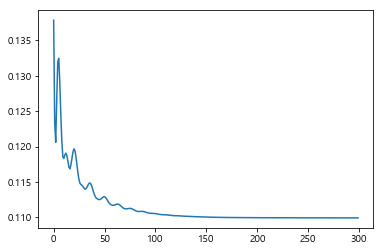

In [90]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #initialize the tensor
sess.run(tf.local_variables_initializer())
saver = tf.train.Saver()

best_loss = np.infty #set the best loss to 
max_checks_without_progress = 20
checks_without_progress = 0   
for_plot=[]

for epoch in range(training_epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = shuffle_batch(X_train, y_train_2, batch_size)
      
        c, _ =sess.run([rmse, optimizer], feed_dict={X: batch_xs, y:batch_ys, keep_prob: 0.7})
        avg_cost += c 
        
        if avg_cost < best_loss:
            save_path = saver.save(sess, "./seoul1.ckpt")
            best_loss =  avg_cost
            checks_without_progress = 0
        else:
            checks_without_progress += 1
            if checks_without_progress > max_checks_without_progress:
                break
    avg_cost= avg_cost / total_batch
    for_plot.append(avg_cost)
   
    print("{}\t검증 세트 손실: {:.6f}\t최선의 손실: {:.9f}".format(
            epoch, avg_cost, best_loss))
    
print('Learning Finished!')

plt.plot(for_plot)
plt.show()
#wirter = tf.summary.FileWriter('./mygraph',sess.graph)

#ValueError: Cannot feed value of shape (101, 2) for Tensor 'y:0', which has shape '(?, 1)'

INFO:tensorflow:Restoring parameters from ./seoul1.ckpt
테스트 데이터의 RMSE: [0.1244421]


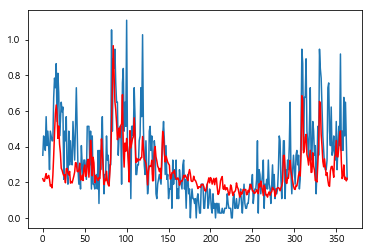

In [91]:

with tf.Session() as sess:
    saver.restore(sess, "./seoul1.ckpt")
    acc_test = sess.run([rmse],feed_dict={X: X_test, y: y_test_2})
    print("테스트 데이터의 RMSE:" ,acc_test)
    #numpy.concatenate([hypothesis], axis=-1)
    pred=sess.run(hypothesis, feed_dict={X:X_test})
    
    plt.plot(date, y_test_2, date, pred, 'r-')
    plt.show()


    